In [3]:
!pip install kmodes

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import ast 
from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from kmodes.kprototypes import KPrototypes
from kmodes.kmodes import KModes
from sklearn.preprocessing import OneHotEncoder

In [5]:
jobs=pd.read_csv('jobs_naukri_1.csv', error_bad_lines=False,sep=',')

In [6]:
jobs.head()

,Uniq Id,Crawl Timestamp,Job Title,Job Salary,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role
0,9be62c49a0b7ebe982a4af1edaa7bc5f,2019-07-05 01:46:07 +0000,Digital Media Planner,Not Disclosed by Recruiter,5 - 10 yrs,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager
1,3c52d436e39f596b22519da2612f6a56,2019-07-06 08:04:50 +0000,Online Bidding Executive,Not Disclosed by Recruiter,2 - 5 yrs,pre sales| closing| software knowledge| client...,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer
2,ffad8a2396c60be2bf6d0e2ff47c58d4,2019-08-05 15:50:44 +0000,Trainee Research/ Research Executive- Hi- Tech...,Not Disclosed by Recruiter,0 - 1 yrs,Computer science| Fabrication| Quality check| ...,R&D,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive
3,7b921f51b5c2fb862b4a5f7a54c37f75,2019-08-05 15:31:56 +0000,Technical Support,"2,00,000 - 4,00,000 PA.",0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer
4,2d8b7d44e138a54d5dc841163138de50,2019-07-05 02:48:29 +0000,Software Test Engineer -hyderabad,Not Disclosed by Recruiter,2 - 5 yrs,manual testing| test engineering| test cases| ...,Programming & Design,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer


In [7]:
print(jobs['Key Skills'].value_counts())


Help Desk| Customer Service| customer relationship| access controls| Asset Management| Vendor Management                                                   101
Counselor| Mentor| Trainer| Advisor| Teaching                                                                                                              101
Teaching| Educator| Counselor| Mentor| Trainer| Advisor                                                                                                     94
marketing executive| distributors| customer profiling| sales strategy| market research| Business Development| sales executive                               63
c++| C| design| MySQL| JavaScript| HTML                                                                                                                     59
                                                                                                                                                          ... 
male nurse                                    

In [8]:
print(pd.get_dummies(jobs['Industry']).head(5))

   * A US based $4.0 billion world leader in staffing services to over 6000 customers globally. * World's largest "Technology" staffing company in the world today - IT, Telecom, Infrastructure and Engineering. * TEKsystems is a part of Allegis Group which is a $16.0 Billion US based privately held firm. One of the world's largest privately held companies (source: Forbes) * The 6th Largest staffing company in the world and the 2nd Largest in the US. * One of the top vendors to 90% of Fortune 500 companies. * Every year we deploy over 80,000 employees across different parts of the world. * Operations in North America, Europe and Asia with over 300 offices across locations. * In India, TEKsystems currently has 1000+ technical consultants employed at various Fortune 500 companies across the country. * For the second consecutive year, TEKsystems was named to Fortune magazine's "100 Best Companies to Work For" in 2014. * Please visit - www.teksystems.com ; www.allegisgroup.com, for more info

In [9]:
print(pd.get_dummies(jobs['Role Category']).head(5))

    Dear Candidate� Greetings from IndiaMART Company Profile: IndiaMART is India's largest online B2B marketplace, connecting buyers with suppliers. With 60% market share of the online B2B Classified space in India, the channel focuses on providing a platform to Small & Medium Enterprises (SMEs), large enterprises as well as individuals. Founded in 1999, the company's mission is to make doing business easy.� � IndiaMART offers a platform to 5.98 Crore buyers to search from over 5.01 crore products and get connected with over 47 lakhs reliable and competitive suppliers.� IndiaMART has been the proud recipient of the Red Herring 100 Asia Award in 2008, as one of the top promising Asian companies driving the future of technology. Led by innovation and backed by experience, the company introduced a pioneering service in 2012 called Buy Leads. The commitment to bring affordable and low-cost solutions to the SMEs laid the foundation for this low-cost solution, which was bestowed with the Man

In [10]:
jobs.isnull().any().sum()

9

In [11]:
jobs.isnull().sum().sort_values(ascending=False)

Role Category              2149
Key Skills                 1243
Role                        790
Location                    473
Job Title                   471
Job Experience Required     469
Functional Area             469
Industry                    469
Job Salary                   51
Uniq Id                       0
Crawl Timestamp               0
dtype: int64

In [12]:
jobs=jobs.dropna(axis=0)

In [13]:
jobs.isnull().sum().sort_values(ascending=False)

Uniq Id                    0
Crawl Timestamp            0
Job Title                  0
Job Salary                 0
Job Experience Required    0
Key Skills                 0
Role Category              0
Location                   0
Functional Area            0
Industry                   0
Role                       0
dtype: int64

In [14]:
jobs.head(5)

,Uniq Id,Crawl Timestamp,Job Title,Job Salary,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role
0,9be62c49a0b7ebe982a4af1edaa7bc5f,2019-07-05 01:46:07 +0000,Digital Media Planner,Not Disclosed by Recruiter,5 - 10 yrs,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager
1,3c52d436e39f596b22519da2612f6a56,2019-07-06 08:04:50 +0000,Online Bidding Executive,Not Disclosed by Recruiter,2 - 5 yrs,pre sales| closing| software knowledge| client...,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer
2,ffad8a2396c60be2bf6d0e2ff47c58d4,2019-08-05 15:50:44 +0000,Trainee Research/ Research Executive- Hi- Tech...,Not Disclosed by Recruiter,0 - 1 yrs,Computer science| Fabrication| Quality check| ...,R&D,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive
3,7b921f51b5c2fb862b4a5f7a54c37f75,2019-08-05 15:31:56 +0000,Technical Support,"2,00,000 - 4,00,000 PA.",0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer
4,2d8b7d44e138a54d5dc841163138de50,2019-07-05 02:48:29 +0000,Software Test Engineer -hyderabad,Not Disclosed by Recruiter,2 - 5 yrs,manual testing| test engineering| test cases| ...,Programming & Design,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer


In [15]:
print(pd.get_dummies(jobs['Role Category']).head(5))

    Dear Candidate� Greetings from IndiaMART Company Profile: IndiaMART is India's largest online B2B marketplace, connecting buyers with suppliers. With 60% market share of the online B2B Classified space in India, the channel focuses on providing a platform to Small & Medium Enterprises (SMEs), large enterprises as well as individuals. Founded in 1999, the company's mission is to make doing business easy.� � IndiaMART offers a platform to 5.98 Crore buyers to search from over 5.01 crore products and get connected with over 47 lakhs reliable and competitive suppliers.� IndiaMART has been the proud recipient of the Red Herring 100 Asia Award in 2008, as one of the top promising Asian companies driving the future of technology. Led by innovation and backed by experience, the company introduced a pioneering service in 2012 called Buy Leads. The commitment to bring affordable and low-cost solutions to the SMEs laid the foundation for this low-cost solution, which was bestowed with the Man

In [16]:
jobs.shape

(26946, 11)

In [17]:
jobs.values

array([['9be62c49a0b7ebe982a4af1edaa7bc5f', '2019-07-05 01:46:07 +0000',
        'Digital Media Planner', ...,
        'Marketing , Advertising , MR , PR , Media Planning',
        'Advertising, PR, MR, Event Management',
        'Media Planning Executive/Manager'],
       ['3c52d436e39f596b22519da2612f6a56', '2019-07-06 08:04:50 +0000',
        'Online Bidding Executive', ...,
        'Sales , Retail , Business Development',
        'IT-Software, Software Services', 'Sales Executive/Officer'],
       ['ffad8a2396c60be2bf6d0e2ff47c58d4', '2019-08-05 15:50:44 +0000',
        'Trainee Research/ Research Executive- Hi- Tech Operations', ...,
        'Engineering Design , R&D', 'Recruitment, Staffing',
        'R&D Executive'],
       ...,
       ['43d5b806b26ed99d3ebfc8f366b4cdd1', '2019-08-05 09:41:29 +0000',
        'Assoc. Prof.- CS', ...,
        'Teaching , Education , Training , Counselling',
        'Education, Teaching, Training', 'Lecturer/Professor'],
       ['8bc87d14cf56564f16

In [18]:
jobs.columns

Index(['Uniq Id', 'Crawl Timestamp', 'Job Title', 'Job Salary',
       'Job Experience Required', 'Key Skills', 'Role Category', 'Location',
       'Functional Area', 'Industry', 'Role'],
      dtype='object')

In [19]:
jobs.values

array([['9be62c49a0b7ebe982a4af1edaa7bc5f', '2019-07-05 01:46:07 +0000',
        'Digital Media Planner', ...,
        'Marketing , Advertising , MR , PR , Media Planning',
        'Advertising, PR, MR, Event Management',
        'Media Planning Executive/Manager'],
       ['3c52d436e39f596b22519da2612f6a56', '2019-07-06 08:04:50 +0000',
        'Online Bidding Executive', ...,
        'Sales , Retail , Business Development',
        'IT-Software, Software Services', 'Sales Executive/Officer'],
       ['ffad8a2396c60be2bf6d0e2ff47c58d4', '2019-08-05 15:50:44 +0000',
        'Trainee Research/ Research Executive- Hi- Tech Operations', ...,
        'Engineering Design , R&D', 'Recruitment, Staffing',
        'R&D Executive'],
       ...,
       ['43d5b806b26ed99d3ebfc8f366b4cdd1', '2019-08-05 09:41:29 +0000',
        'Assoc. Prof.- CS', ...,
        'Teaching , Education , Training , Counselling',
        'Education, Teaching, Training', 'Lecturer/Professor'],
       ['8bc87d14cf56564f16

In [20]:
jobs.shape

(26946, 11)

In [21]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26946 entries, 0 to 29785
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Uniq Id                  26946 non-null  object
 1   Crawl Timestamp          26946 non-null  object
 2   Job Title                26946 non-null  object
 3   Job Salary               26946 non-null  object
 4   Job Experience Required  26946 non-null  object
 5   Key Skills               26946 non-null  object
 6   Role Category            26946 non-null  object
 7   Location                 26946 non-null  object
 8   Functional Area          26946 non-null  object
 9   Industry                 26946 non-null  object
 10  Role                     26946 non-null  object
dtypes: object(11)
memory usage: 2.5+ MB


In [22]:
jobs['Role Category']

0                                       Advertising
1                                      Retail Sales
2                                               R&D
3        Admin/Maintenance/Security/Datawarehousing
4                              Programming & Design
                            ...                    
29781                          Programming & Design
29782                                    Operations
29783                              University Level
29784                          Programming & Design
29785                      Online/Digital Marketing
Name: Role Category, Length: 26946, dtype: object

In [23]:
print(pd.get_dummies(jobs['Industry']).head(5))

   * A US based $4.0 billion world leader in staffing services to over 6000 customers globally. * World's largest "Technology" staffing company in the world today - IT, Telecom, Infrastructure and Engineering. * TEKsystems is a part of Allegis Group which is a $16.0 Billion US based privately held firm. One of the world's largest privately held companies (source: Forbes) * The 6th Largest staffing company in the world and the 2nd Largest in the US. * One of the top vendors to 90% of Fortune 500 companies. * Every year we deploy over 80,000 employees across different parts of the world. * Operations in North America, Europe and Asia with over 300 offices across locations. * In India, TEKsystems currently has 1000+ technical consultants employed at various Fortune 500 companies across the country. * For the second consecutive year, TEKsystems was named to Fortune magazine's "100 Best Companies to Work For" in 2014. * Please visit - www.teksystems.com ; www.allegisgroup.com, for more info

In [24]:
for col_name in jobs.columns:
    if jobs[col_name].dtypes=='object':
        unique_cat=len(jobs[col_name].unique())
        print("Feature '{col_name}' has '{unique_cat}'uniques categories".format(col_name=col_name,unique_cat=unique_cat))

Feature 'Uniq Id' has '26946'uniques categories
Feature 'Crawl Timestamp' has '26007'uniques categories
Feature 'Job Title' has '21595'uniques categories
Feature 'Job Salary' has '1027'uniques categories
Feature 'Job Experience Required' has '245'uniques categories
Feature 'Key Skills' has '25224'uniques categories
Feature 'Role Category' has '178'uniques categories
Feature 'Location' has '2414'uniques categories
Feature 'Functional Area' has '61'uniques categories
Feature 'Industry' has '114'uniques categories
Feature 'Role' has '603'uniques categories


In [25]:
jobs.head()

,Uniq Id,Crawl Timestamp,Job Title,Job Salary,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role
0,9be62c49a0b7ebe982a4af1edaa7bc5f,2019-07-05 01:46:07 +0000,Digital Media Planner,Not Disclosed by Recruiter,5 - 10 yrs,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager
1,3c52d436e39f596b22519da2612f6a56,2019-07-06 08:04:50 +0000,Online Bidding Executive,Not Disclosed by Recruiter,2 - 5 yrs,pre sales| closing| software knowledge| client...,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer
2,ffad8a2396c60be2bf6d0e2ff47c58d4,2019-08-05 15:50:44 +0000,Trainee Research/ Research Executive- Hi- Tech...,Not Disclosed by Recruiter,0 - 1 yrs,Computer science| Fabrication| Quality check| ...,R&D,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive
3,7b921f51b5c2fb862b4a5f7a54c37f75,2019-08-05 15:31:56 +0000,Technical Support,"2,00,000 - 4,00,000 PA.",0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer
4,2d8b7d44e138a54d5dc841163138de50,2019-07-05 02:48:29 +0000,Software Test Engineer -hyderabad,Not Disclosed by Recruiter,2 - 5 yrs,manual testing| test engineering| test cases| ...,Programming & Design,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer


In [26]:
jobs.columns


Index(['Uniq Id', 'Crawl Timestamp', 'Job Title', 'Job Salary',
       'Job Experience Required', 'Key Skills', 'Role Category', 'Location',
       'Functional Area', 'Industry', 'Role'],
      dtype='object')

In [27]:
jobs.head()


,Uniq Id,Crawl Timestamp,Job Title,Job Salary,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role
0,9be62c49a0b7ebe982a4af1edaa7bc5f,2019-07-05 01:46:07 +0000,Digital Media Planner,Not Disclosed by Recruiter,5 - 10 yrs,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager
1,3c52d436e39f596b22519da2612f6a56,2019-07-06 08:04:50 +0000,Online Bidding Executive,Not Disclosed by Recruiter,2 - 5 yrs,pre sales| closing| software knowledge| client...,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer
2,ffad8a2396c60be2bf6d0e2ff47c58d4,2019-08-05 15:50:44 +0000,Trainee Research/ Research Executive- Hi- Tech...,Not Disclosed by Recruiter,0 - 1 yrs,Computer science| Fabrication| Quality check| ...,R&D,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive
3,7b921f51b5c2fb862b4a5f7a54c37f75,2019-08-05 15:31:56 +0000,Technical Support,"2,00,000 - 4,00,000 PA.",0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer
4,2d8b7d44e138a54d5dc841163138de50,2019-07-05 02:48:29 +0000,Software Test Engineer -hyderabad,Not Disclosed by Recruiter,2 - 5 yrs,manual testing| test engineering| test cases| ...,Programming & Design,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer


In [28]:
print(jobs['Role Category'].value_counts())

Programming & Design                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [29]:
jobs_enhanced=jobs['Role Category'].value_counts()>=30

In [30]:
jobs_enhanced.head()

Programming & Design                          True
Voice                                         True
Retail Sales                                  True
HR/ Recruitment / IR                          True
Admin/Maintenance/Security/Datawarehousing    True
Name: Role Category, dtype: bool

In [31]:
jobs_enhanced[jobs_enhanced].shape

(54,)

In [32]:
jobs.shape

(26946, 11)

In [33]:
roles=jobs_enhanced[jobs_enhanced].index

In [34]:
roles

Index(['Programming & Design', 'Voice', 'Retail Sales', 'HR/ Recruitment / IR',
       'Admin/Maintenance/Security/Datawarehousing', 'Accounts',
       'Senior Management', 'Other', 'Corporate Sales',
       'Production/Manufacturing/Maintenance',
       'System Design/Implementation/ERP/CRM', 'Marketing',
       'Medical Professional', 'Creative', 'Engineering Design',
       'Finance/Audit', 'Teachers', 'Project Management', 'University Level',
       'Back Office/Web/Transaction Processing', 'Institutional Sales',
       'Channel Sales', 'Retail/Personal Banking', 'Site Engineering',
       'Analytics & BI', 'Content Development', 'R&D',
       'Purchase/Material Management', 'Operations',
       'Administration/Facility Management', 'Sales Support',
       'Food & Beverage', 'Logistics', 'Online/Digital Marketing',
       'Advertising', 'Corporate Planning/Consulting/Strategy',
       'QA/Testing/Documentation', 'Ticketing/Travel/Documentation',
       'Technical Support', 'Operati

In [35]:
jobs=jobs[jobs['Role Category'].isin(roles)]

In [36]:
jobs.head()

,Uniq Id,Crawl Timestamp,Job Title,Job Salary,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role
0,9be62c49a0b7ebe982a4af1edaa7bc5f,2019-07-05 01:46:07 +0000,Digital Media Planner,Not Disclosed by Recruiter,5 - 10 yrs,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager
1,3c52d436e39f596b22519da2612f6a56,2019-07-06 08:04:50 +0000,Online Bidding Executive,Not Disclosed by Recruiter,2 - 5 yrs,pre sales| closing| software knowledge| client...,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer
2,ffad8a2396c60be2bf6d0e2ff47c58d4,2019-08-05 15:50:44 +0000,Trainee Research/ Research Executive- Hi- Tech...,Not Disclosed by Recruiter,0 - 1 yrs,Computer science| Fabrication| Quality check| ...,R&D,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive
3,7b921f51b5c2fb862b4a5f7a54c37f75,2019-08-05 15:31:56 +0000,Technical Support,"2,00,000 - 4,00,000 PA.",0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer
4,2d8b7d44e138a54d5dc841163138de50,2019-07-05 02:48:29 +0000,Software Test Engineer -hyderabad,Not Disclosed by Recruiter,2 - 5 yrs,manual testing| test engineering| test cases| ...,Programming & Design,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer


In [37]:
jobs.shape


(26410, 11)

In [38]:
print(jobs['Role Category'].value_counts())

Programming & Design                          8363
Voice                                         2342
Retail Sales                                  2316
HR/ Recruitment / IR                          1097
Admin/Maintenance/Security/Datawarehousing     906
Accounts                                       861
Senior Management                              854
Other                                          850
Corporate Sales                                693
Production/Manufacturing/Maintenance           568
System Design/Implementation/ERP/CRM           486
Marketing                                      466
Medical Professional                           407
Creative                                       389
Engineering Design                             355
Finance/Audit                                  334
Teachers                                       319
Project Management                             299
University Level                               293
Back Office/Web/Transaction Pro

In [39]:
print(jobs['Industry'].value_counts())

IT-Software, Software Services          9612
Recruitment, Staffing                   2473
BPO, Call Centre, ITeS                  1681
Banking, Financial Services, Broking    1494
Education, Teaching, Training           1018
                                        ... 
Glass / Glassware                          1
Architecture / Interior Design             1
Gems / Jewellery                           1
Mining / Quarrying                         1
Export / Import                            1
Name: Industry, Length: 100, dtype: int64


In [40]:
roles_enhanced=jobs['Industry'].value_counts()>=30

In [41]:
roles_enhanced

IT-Software, Software Services           True
Recruitment, Staffing                    True
BPO, Call Centre, ITeS                   True
Banking, Financial Services, Broking     True
Education, Teaching, Training            True
                                        ...  
Glass / Glassware                       False
Architecture / Interior Design          False
Gems / Jewellery                        False
Mining / Quarrying                      False
Export / Import                         False
Name: Industry, Length: 100, dtype: bool

In [42]:
roles_enhanced[roles_enhanced].shape

(48,)

In [43]:
industry=roles_enhanced[roles_enhanced].index

In [44]:
print(pd.get_dummies(jobs['Industry']).head(5))

   Accounting / Finance  Accounting, Finance  \
0                     0                    0   
1                     0                    0   
2                     0                    0   
3                     0                    0   
4                     0                    0   

   Advertising / PR / MR / Event Management  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   Advertising, PR, MR, Event Management  Agriculture / Dairy  \
0                                      1                    0   
1                                      0                    0   
2                                      0                    0   
3                                      0                    0   
4                                      0                    0   

   Agriculture, Dairy  Animation, Gam

In [45]:
industry

Index(['IT-Software, Software Services', 'Recruitment, Staffing',
       'BPO, Call Centre, ITeS', 'Banking, Financial Services, Broking',
       'Education, Teaching, Training', 'IT-Software / Software Services',
       'Medical, Healthcare, Hospitals', 'Internet, Ecommerce',
       'Construction, Engineering, Cement, Metals',
       'Strategy, Management Consulting Firms',
       'Automobile, Auto Anciliary, Auto Components',
       'Travel , Hotels , Restaurants , Airlines , Railways',
       'Pharma, Biotech, Clinical Research', 'Media, Entertainment, Internet',
       'Industrial Products, Heavy Machinery',
       'Advertising, PR, MR, Event Management', 'Real Estate, Property',
       'Insurance', 'Accounting, Finance', 'FMCG, Foods, Beverage',
       'Retail, Wholesale', 'Oil and Gas, Energy, Power, Infrastructure',
       'Telcom, ISP', 'IT-Hardware & Networking', 'KPO, Research, Analytics',
       'Other', 'Semiconductors, Electronics',
       'Courier, Transportation, Freight

In [46]:
jobs=jobs[jobs['Industry'].isin(industry)]

In [47]:
jobs.shape

(25790, 11)

In [48]:
print(jobs['Industry'].value_counts())

IT-Software, Software Services                             9612
Recruitment, Staffing                                      2473
BPO, Call Centre, ITeS                                     1681
Banking, Financial Services, Broking                       1494
Education, Teaching, Training                              1018
IT-Software / Software Services                             754
Medical, Healthcare, Hospitals                              568
Internet, Ecommerce                                         527
Construction, Engineering, Cement, Metals                   489
Strategy, Management Consulting Firms                       472
Automobile, Auto Anciliary, Auto Components                 453
Travel , Hotels , Restaurants , Airlines , Railways         428
Pharma, Biotech, Clinical Research                          416
Media, Entertainment, Internet                              405
Industrial Products, Heavy Machinery                        401
Advertising, PR, MR, Event Management   

In [49]:
jobs

,Uniq Id,Crawl Timestamp,Job Title,Job Salary,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role
0,9be62c49a0b7ebe982a4af1edaa7bc5f,2019-07-05 01:46:07 +0000,Digital Media Planner,Not Disclosed by Recruiter,5 - 10 yrs,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager
1,3c52d436e39f596b22519da2612f6a56,2019-07-06 08:04:50 +0000,Online Bidding Executive,Not Disclosed by Recruiter,2 - 5 yrs,pre sales| closing| software knowledge| client...,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer
2,ffad8a2396c60be2bf6d0e2ff47c58d4,2019-08-05 15:50:44 +0000,Trainee Research/ Research Executive- Hi- Tech...,Not Disclosed by Recruiter,0 - 1 yrs,Computer science| Fabrication| Quality check| ...,R&D,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive
3,7b921f51b5c2fb862b4a5f7a54c37f75,2019-08-05 15:31:56 +0000,Technical Support,"2,00,000 - 4,00,000 PA.",0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer
4,2d8b7d44e138a54d5dc841163138de50,2019-07-05 02:48:29 +0000,Software Test Engineer -hyderabad,Not Disclosed by Recruiter,2 - 5 yrs,manual testing| test engineering| test cases| ...,Programming & Design,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer
...,...,...,...,...,...,...,...,...,...,...,...
29781,3510f2146b514f112eaa9706a16b3900,2019-07-06 21:12:51 +0000,MTS-Software-Engineer,Not Disclosed by Recruiter,9 - 12 yrs,Graphics| C++| USB| Project management| SOC| F...,Programming & Design,Bengaluru,"IT Software - Embedded , EDA , VLSI , ASIC , C...","Semiconductors, Electronics",Software Developer
29782,4af8c56f5b4c535b1974065003f2d548,2019-08-05 23:55:08 +0000,Client Relationship Manager,Not Disclosed by Recruiter,1 - 5 yrs,Service delivery| LMS| CRE| Integration servic...,Operations,Chennai,"ITES , BPO , KPO , LPO , Customer Service , Op...","Education, Teaching, Training",Operations Manager
29783,43d5b806b26ed99d3ebfc8f366b4cdd1,2019-08-05 09:41:29 +0000,Assoc. Prof.- CS,Not Disclosed by Recruiter,4 - 6 yrs,Counselor| Mentor| Trainer| Advisor| Teaching,University Level,Howrah,"Teaching , Education , Training , Counselling","Education, Teaching, Training",Lecturer/Professor
29784,8bc87d14cf56564f16b6d4bae80180be,2019-08-06 01:44:55 +0000,Application/Cyber Security Specialist-Pune,Not Disclosed by Recruiter,5 - 10 yrs,Security Analysis| Software Development Life C...,Programming & Design,Pune,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Software Developer


In [50]:
jobs.shape

(25790, 11)

In [51]:
jobs.columns

Index(['Uniq Id', 'Crawl Timestamp', 'Job Title', 'Job Salary',
       'Job Experience Required', 'Key Skills', 'Role Category', 'Location',
       'Functional Area', 'Industry', 'Role'],
      dtype='object')

In [52]:
role_wise_job=jobs.groupby(['Role Category']).size().reset_index(name='diff_roles').sort_values('diff_roles',ascending=False)

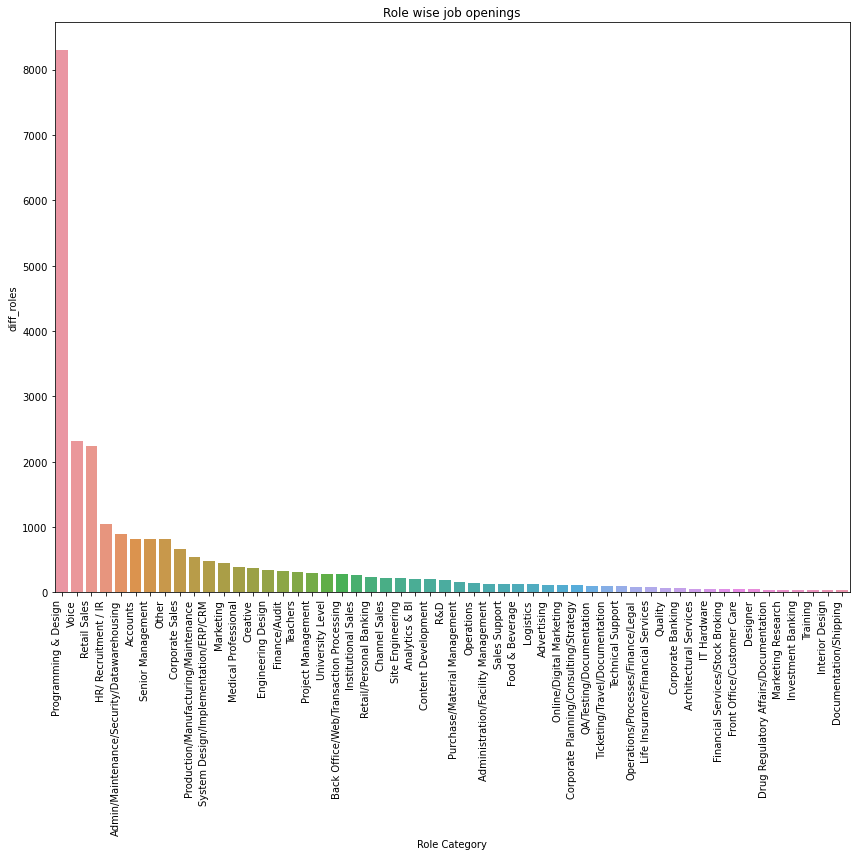

In [53]:
plt.figure(figsize=(12,12))
ax = sns.barplot(x="Role Category", y="diff_roles", data=role_wise_job)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

ax.set_title('Role wise job openings')
plt.tight_layout()
plt.show()

In [54]:
industry_wise_job=jobs.groupby(['Industry']).size().reset_index(name='ind_roles').sort_values('ind_roles',ascending=False)

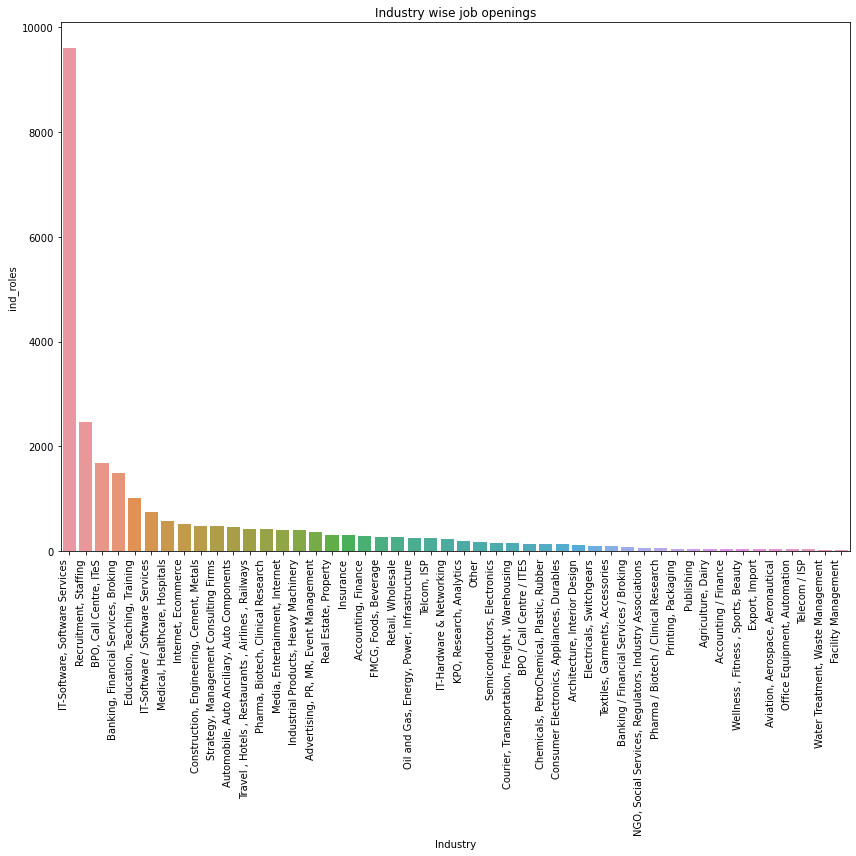

In [55]:
plt.figure(figsize=(12,12))
ax = sns.barplot(x="Industry", y="ind_roles", data=industry_wise_job)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

ax.set_title('Industry wise job openings')
plt.tight_layout()
plt.show()

In [56]:
for col_name in jobs.columns:
    if jobs[col_name].dtypes=='object':
        unique_cat=len(jobs[col_name].unique())
        print("Feature '{col_name}' has '{unique_cat}'uniques categories".format(col_name=col_name,unique_cat=unique_cat)) 

Feature 'Uniq Id' has '25790'uniques categories
Feature 'Crawl Timestamp' has '24925'uniques categories
Feature 'Job Title' has '20628'uniques categories
Feature 'Job Salary' has '936'uniques categories
Feature 'Job Experience Required' has '236'uniques categories
Feature 'Key Skills' has '24124'uniques categories
Feature 'Role Category' has '54'uniques categories
Feature 'Location' has '2301'uniques categories
Feature 'Functional Area' has '42'uniques categories
Feature 'Industry' has '48'uniques categories
Feature 'Role' has '434'uniques categories


In [57]:
print(jobs)

                                Uniq Id            Crawl Timestamp  \
0      9be62c49a0b7ebe982a4af1edaa7bc5f  2019-07-05 01:46:07 +0000   
1      3c52d436e39f596b22519da2612f6a56  2019-07-06 08:04:50 +0000   
2      ffad8a2396c60be2bf6d0e2ff47c58d4  2019-08-05 15:50:44 +0000   
3      7b921f51b5c2fb862b4a5f7a54c37f75  2019-08-05 15:31:56 +0000   
4      2d8b7d44e138a54d5dc841163138de50  2019-07-05 02:48:29 +0000   
...                                 ...                        ...   
29781  3510f2146b514f112eaa9706a16b3900  2019-07-06 21:12:51 +0000   
29782  4af8c56f5b4c535b1974065003f2d548  2019-08-05 23:55:08 +0000   
29783  43d5b806b26ed99d3ebfc8f366b4cdd1  2019-08-05 09:41:29 +0000   
29784  8bc87d14cf56564f16b6d4bae80180be  2019-08-06 01:44:55 +0000   
29785  9c7045d111814a6f39fe461eab2b0bf8  2019-07-06 22:24:55 +0000   

                                               Job Title  \
0                                  Digital Media Planner   
1                               Online 

In [58]:
jobs.iloc[5000]

Uniq Id                                     87f8e29a81cecf0537e4498a45843538
Crawl Timestamp                                    2019-07-04 04:35:12 +0000
Job Title                  Required 10th/12th Pass Freshers For Telecalli...
Job Salary                                          1,50,000 - 3,25,000 PA. 
Job Experience Required                                            0 - 1 yrs
Key Skills                 Customer Care| Inbound Process| Night Shift| C...
Role Category                                                          Other
Location                                                           Delhi NCR
Functional Area            ITES , BPO , KPO , LPO , Customer Service , Op...
Industry                                              BPO, Call Centre, ITeS
Role                                                                 Fresher
Name: 5738, dtype: object

In [59]:
jobs.isnull().any().sum()

0

In [60]:
jobs.isnull().sum().sort_values(ascending=False)

Uniq Id                    0
Crawl Timestamp            0
Job Title                  0
Job Salary                 0
Job Experience Required    0
Key Skills                 0
Role Category              0
Location                   0
Functional Area            0
Industry                   0
Role                       0
dtype: int64

In [61]:
jobs.head()

,Uniq Id,Crawl Timestamp,Job Title,Job Salary,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role
0,9be62c49a0b7ebe982a4af1edaa7bc5f,2019-07-05 01:46:07 +0000,Digital Media Planner,Not Disclosed by Recruiter,5 - 10 yrs,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager
1,3c52d436e39f596b22519da2612f6a56,2019-07-06 08:04:50 +0000,Online Bidding Executive,Not Disclosed by Recruiter,2 - 5 yrs,pre sales| closing| software knowledge| client...,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer
2,ffad8a2396c60be2bf6d0e2ff47c58d4,2019-08-05 15:50:44 +0000,Trainee Research/ Research Executive- Hi- Tech...,Not Disclosed by Recruiter,0 - 1 yrs,Computer science| Fabrication| Quality check| ...,R&D,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive
3,7b921f51b5c2fb862b4a5f7a54c37f75,2019-08-05 15:31:56 +0000,Technical Support,"2,00,000 - 4,00,000 PA.",0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer
4,2d8b7d44e138a54d5dc841163138de50,2019-07-05 02:48:29 +0000,Software Test Engineer -hyderabad,Not Disclosed by Recruiter,2 - 5 yrs,manual testing| test engineering| test cases| ...,Programming & Design,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer


In [62]:
jobs.columns

Index(['Uniq Id', 'Crawl Timestamp', 'Job Title', 'Job Salary',
       'Job Experience Required', 'Key Skills', 'Role Category', 'Location',
       'Functional Area', 'Industry', 'Role'],
      dtype='object')

In [63]:
jobs_for_predict=jobs[['Role Category',
       'Functional Area', 'Industry']]

In [64]:
jobs_for_predict.head()

,Role Category,Functional Area,Industry
0,Advertising,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management"
1,Retail Sales,"Sales , Retail , Business Development","IT-Software, Software Services"
2,R&D,"Engineering Design , R&D","Recruitment, Staffing"
3,Admin/Maintenance/Security/Datawarehousing,"IT Software - Application Programming , Mainte...","IT-Software, Software Services"
4,Programming & Design,IT Software - QA & Testing,"IT-Software, Software Services"


In [65]:
mark_array=jobs_for_predict.values

In [66]:
mark_array

array([['Advertising',
        'Marketing , Advertising , MR , PR , Media Planning',
        'Advertising, PR, MR, Event Management'],
       ['Retail Sales', 'Sales , Retail , Business Development',
        'IT-Software, Software Services'],
       ['R&D', 'Engineering Design , R&D', 'Recruitment, Staffing'],
       ...,
       ['University Level',
        'Teaching , Education , Training , Counselling',
        'Education, Teaching, Training'],
       ['Programming & Design',
        'IT Software - Application Programming , Maintenance',
        'IT-Software, Software Services'],
       ['Online/Digital Marketing',
        'Marketing , Advertising , MR , PR , Media Planning',
        'IT-Software, Software Services']], dtype=object)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 52270.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 52270.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 52270.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 52270.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 52270.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 305, cost: 46284.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 12, cost: 51306.0
Init: initializing centroids
Init: initializing clusters
Starting iterat

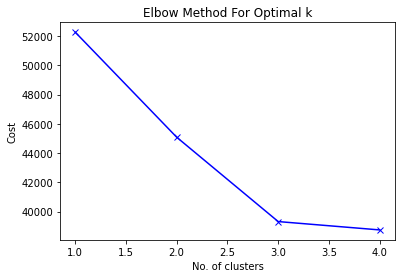

In [67]:
# Elbow curve to find optimal K
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(mark_array)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [68]:
# Building the model with 30 clusters
kmode = KModes(n_clusters=30, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(mark_array)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1984, cost: 23180.0
Run 1, iteration: 2/100, moves: 23, cost: 23180.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 3177, cost: 24722.0
Run 2, iteration: 2/100, moves: 51, cost: 24722.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 4765, cost: 23625.0
Run 3, iteration: 2/100, moves: 206, cost: 23625.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 3976, cost: 26074.0
Run 4, iteration: 2/100, moves: 1094, cost: 24775.0
Run 4, iteration: 3/100, moves: 157, cost: 24775.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 3752, cost: 23097.0
Run 5, iteration: 2/100, moves: 561, cost: 22974.0
Run 5, iteration: 3/100, moves: 39,

array([19,  9,  3, ...,  6,  0,  0], dtype=uint16)

In [69]:
jobs.insert(0, "Cluster", clusters, True)
jobs

,Cluster,Uniq Id,Crawl Timestamp,Job Title,Job Salary,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role
0,19,9be62c49a0b7ebe982a4af1edaa7bc5f,2019-07-05 01:46:07 +0000,Digital Media Planner,Not Disclosed by Recruiter,5 - 10 yrs,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager
1,9,3c52d436e39f596b22519da2612f6a56,2019-07-06 08:04:50 +0000,Online Bidding Executive,Not Disclosed by Recruiter,2 - 5 yrs,pre sales| closing| software knowledge| client...,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer
2,3,ffad8a2396c60be2bf6d0e2ff47c58d4,2019-08-05 15:50:44 +0000,Trainee Research/ Research Executive- Hi- Tech...,Not Disclosed by Recruiter,0 - 1 yrs,Computer science| Fabrication| Quality check| ...,R&D,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive
3,0,7b921f51b5c2fb862b4a5f7a54c37f75,2019-08-05 15:31:56 +0000,Technical Support,"2,00,000 - 4,00,000 PA.",0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer
4,14,2d8b7d44e138a54d5dc841163138de50,2019-07-05 02:48:29 +0000,Software Test Engineer -hyderabad,Not Disclosed by Recruiter,2 - 5 yrs,manual testing| test engineering| test cases| ...,Programming & Design,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer
...,...,...,...,...,...,...,...,...,...,...,...,...
29781,0,3510f2146b514f112eaa9706a16b3900,2019-07-06 21:12:51 +0000,MTS-Software-Engineer,Not Disclosed by Recruiter,9 - 12 yrs,Graphics| C++| USB| Project management| SOC| F...,Programming & Design,Bengaluru,"IT Software - Embedded , EDA , VLSI , ASIC , C...","Semiconductors, Electronics",Software Developer
29782,6,4af8c56f5b4c535b1974065003f2d548,2019-08-05 23:55:08 +0000,Client Relationship Manager,Not Disclosed by Recruiter,1 - 5 yrs,Service delivery| LMS| CRE| Integration servic...,Operations,Chennai,"ITES , BPO , KPO , LPO , Customer Service , Op...","Education, Teaching, Training",Operations Manager
29783,6,43d5b806b26ed99d3ebfc8f366b4cdd1,2019-08-05 09:41:29 +0000,Assoc. Prof.- CS,Not Disclosed by Recruiter,4 - 6 yrs,Counselor| Mentor| Trainer| Advisor| Teaching,University Level,Howrah,"Teaching , Education , Training , Counselling","Education, Teaching, Training",Lecturer/Professor
29784,0,8bc87d14cf56564f16b6d4bae80180be,2019-08-06 01:44:55 +0000,Application/Cyber Security Specialist-Pune,Not Disclosed by Recruiter,5 - 10 yrs,Security Analysis| Software Development Life C...,Programming & Design,Pune,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Software Developer


In [70]:
for col_name in jobs.columns:
    if jobs[col_name].dtypes=='object':
        unique_cat=len(jobs[col_name].unique())
        print("Feature '{col_name}' has '{unique_cat}'uniques categories".format(col_name=col_name,unique_cat=unique_cat)) 

Feature 'Uniq Id' has '25790'uniques categories
Feature 'Crawl Timestamp' has '24925'uniques categories
Feature 'Job Title' has '20628'uniques categories
Feature 'Job Salary' has '936'uniques categories
Feature 'Job Experience Required' has '236'uniques categories
Feature 'Key Skills' has '24124'uniques categories
Feature 'Role Category' has '54'uniques categories
Feature 'Location' has '2301'uniques categories
Feature 'Functional Area' has '42'uniques categories
Feature 'Industry' has '48'uniques categories
Feature 'Role' has '434'uniques categories


In [71]:
jobs.shape

(25790, 12)

In [72]:
jobs.columns

Index(['Cluster', 'Uniq Id', 'Crawl Timestamp', 'Job Title', 'Job Salary',
       'Job Experience Required', 'Key Skills', 'Role Category', 'Location',
       'Functional Area', 'Industry', 'Role'],
      dtype='object')

In [73]:
for col_name in jobs.columns:
    if jobs[col_name].dtypes=='object':
        unique_cat=len(jobs[col_name].unique())
        print("Feature '{col_name}' has '{unique_cat}'uniques categories".format(col_name=col_name,unique_cat=unique_cat)) 

Feature 'Uniq Id' has '25790'uniques categories
Feature 'Crawl Timestamp' has '24925'uniques categories
Feature 'Job Title' has '20628'uniques categories
Feature 'Job Salary' has '936'uniques categories
Feature 'Job Experience Required' has '236'uniques categories
Feature 'Key Skills' has '24124'uniques categories
Feature 'Role Category' has '54'uniques categories
Feature 'Location' has '2301'uniques categories
Feature 'Functional Area' has '42'uniques categories
Feature 'Industry' has '48'uniques categories
Feature 'Role' has '434'uniques categories


In [74]:
dataTypeSeries = jobs.dtypes
print('Data type of each column of Dataframe :')
print(dataTypeSeries)

Data type of each column of Dataframe :
Cluster                    uint16
Uniq Id                    object
Crawl Timestamp            object
Job Title                  object
Job Salary                 object
Job Experience Required    object
Key Skills                 object
Role Category              object
Location                   object
Functional Area            object
Industry                   object
Role                       object
dtype: object


In [75]:
jobs[jobs['Cluster']==27].head(10)

,Cluster,Uniq Id,Crawl Timestamp,Job Title,Job Salary,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role
146,27,ceb1c82250431b8381773864ba6bc148,2019-08-04 22:46:40 +0000,Head - Project Management,Not Disclosed by Recruiter,15 - 20 yrs,Project Management,Senior Management,Delhi NCR,"Production , Manufacturing , Maintenance","Real Estate, Property",Head/VP/GM-Operations
1658,27,7bf29de5a20d81a1c708fc8e8ddff71d,2019-08-04 08:27:30 +0000,DGM � Maintenance,Not Disclosed by Recruiter,19 - 28 Years,lt breakers|water system|substation|plant oper...,Senior Management,Ahmedabad,"Production , Manufacturing , Maintenance",Pharma / Biotech / Clinical Research,Head/VP/GM-Production/Manufacturing/Maintenance
1863,27,ab1399b370bcf51bf88fed0f64072809,2019-08-04 04:14:14 +0000,General Manager Manufacturing,"20,00,000 - 25,00,000 PA.",15 - 20 yrs,Plant Operations| Production| General Manageme...,Senior Management,"Delhi NCR,Chandigarh","Production , Manufacturing , Maintenance","FMCG, Foods, Beverage",Head/VP/GM-Production/Manufacturing/Maintenance
2789,27,565a316cc2f109c8cbeba3f7f0a0d022,2019-08-04 19:36:33 +0000,Assistant General Manager/deputy General Manag...,"16,00,000 - 20,00,000 PA.",16 - 20 yrs,Purified Water| Pumps| General Management| Wat...,Senior Management,Hyderabad,"Production , Manufacturing , Maintenance","Pharma, Biotech, Clinical Research",Head/VP/GM-Production/Manufacturing/Maintenance
3561,27,c399683b81791fd8c7f894a4decedb2b,2019-08-05 11:44:07 +0000,Quality Control Technician III,Not Disclosed by Recruiter,2 - 5 yrs,TDS| Pharma| Analytical| Method validation| Co...,Senior Management,Chennai,"Production , Manufacturing , Maintenance","Pharma, Biotech, Clinical Research",Head/VP/GM-Quality Assurance/Quality Control
6158,27,476d26e8d8032d79cb402ced6fde0e0e,2019-08-04 16:17:19 +0000,Digital Marketing Manager For FMCG MNC - Gurgaon,"16,00,000 - 25,00,000 PA.",5 - 10 yrs,digital marketing| campaign management| online...,Senior Management,Gurgaon,"Marketing , Advertising , MR , PR , Media Plan...","FMCG, Foods, Beverage",Head/VP/GM/ Mgr-Online/Digital Marketing
6514,27,60ea4422e27fdeb43cb144290d816a4e,2019-07-04 01:57:24 +0000,Head Marketing,Not Disclosed by Recruiter,12 - 18 yrs,marketing| brand awareness| sales| branding| d...,Senior Management,Kolkata,"Marketing , Advertising , MR , PR , Media Plan...","FMCG, Foods, Beverage",Head/VP/GM-Marketing
7837,27,c82fadaad835916baf9a522b72344086,2019-07-04 02:06:40 +0000,Head - Category Demand & Supply Planning,Not Disclosed by Recruiter,7 - 10 yrs,Supply Chain| Demand Planning| Logistics| Supp...,Senior Management,Kolkata,"Supply Chain , Logistics , Purchase , Materials","FMCG, Foods, Beverage",Head/VP/GM-SCM/Logistics
8362,27,850f1178593e5f96d0391556699d5ee0,2019-07-04 01:57:17 +0000,Assistant Manager - Process Excellence - FMCG,Not Disclosed by Recruiter,5 - 10 yrs,Process Excellence| Quality| Lean| Six Sigma| ...,Corporate Planning/Consulting/Strategy,Kolkata,"Strategy , Management Consulting , Corporate P...","FMCG, Foods, Beverage",Corporate Planning/Strategy Manager
10173,27,6dc3a956536b0cf601839bb7ea1d86c3,2019-08-05 20:22:33 +0000,Manufacturing Head,Not Disclosed by Recruiter,10 - 15 yrs,Mechanical engineering,Senior Management,Chennai,"Production , Manufacturing , Maintenance","Strategy, Management Consulting Firms",Head/VP/GM-Production/Manufacturing/Maintenance


In [76]:
jobs.columns

Index(['Cluster', 'Uniq Id', 'Crawl Timestamp', 'Job Title', 'Job Salary',
       'Job Experience Required', 'Key Skills', 'Role Category', 'Location',
       'Functional Area', 'Industry', 'Role'],
      dtype='object')

In [77]:
jobs = jobs[['Cluster', 'Uniq Id','Key Skills', 'Role Category', 'Location',
       'Functional Area', 'Industry', 'Role', 'Job Title']]

In [78]:
jobs.head()

,Cluster,Uniq Id,Key Skills,Role Category,Location,Functional Area,Industry,Role,Job Title
0,19,9be62c49a0b7ebe982a4af1edaa7bc5f,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager,Digital Media Planner
1,9,3c52d436e39f596b22519da2612f6a56,pre sales| closing| software knowledge| client...,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer,Online Bidding Executive
2,3,ffad8a2396c60be2bf6d0e2ff47c58d4,Computer science| Fabrication| Quality check| ...,R&D,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive,Trainee Research/ Research Executive- Hi- Tech...
3,0,7b921f51b5c2fb862b4a5f7a54c37f75,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer,Technical Support
4,14,2d8b7d44e138a54d5dc841163138de50,manual testing| test engineering| test cases| ...,Programming & Design,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer,Software Test Engineer -hyderabad


In [86]:
X = jobs.iloc[:,:-2]
y = jobs.iloc[:,7]

In [87]:
X

,Cluster,Uniq Id,Key Skills,Role Category,Location,Functional Area,Industry
0,19,9be62c49a0b7ebe982a4af1edaa7bc5f,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management"
1,9,3c52d436e39f596b22519da2612f6a56,pre sales| closing| software knowledge| client...,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services"
2,3,ffad8a2396c60be2bf6d0e2ff47c58d4,Computer science| Fabrication| Quality check| ...,R&D,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing"
3,0,7b921f51b5c2fb862b4a5f7a54c37f75,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services"
4,14,2d8b7d44e138a54d5dc841163138de50,manual testing| test engineering| test cases| ...,Programming & Design,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services"
...,...,...,...,...,...,...,...
29781,0,3510f2146b514f112eaa9706a16b3900,Graphics| C++| USB| Project management| SOC| F...,Programming & Design,Bengaluru,"IT Software - Embedded , EDA , VLSI , ASIC , C...","Semiconductors, Electronics"
29782,6,4af8c56f5b4c535b1974065003f2d548,Service delivery| LMS| CRE| Integration servic...,Operations,Chennai,"ITES , BPO , KPO , LPO , Customer Service , Op...","Education, Teaching, Training"
29783,6,43d5b806b26ed99d3ebfc8f366b4cdd1,Counselor| Mentor| Trainer| Advisor| Teaching,University Level,Howrah,"Teaching , Education , Training , Counselling","Education, Teaching, Training"
29784,0,8bc87d14cf56564f16b6d4bae80180be,Security Analysis| Software Development Life C...,Programming & Design,Pune,"IT Software - Application Programming , Mainte...","IT-Software, Software Services"


In [88]:
y

0                  Media Planning Executive/Manager
1                           Sales Executive/Officer
2                                     R&D Executive
3                        Technical Support Engineer
4                                  Testing Engineer
                            ...                    
29781                            Software Developer
29782                            Operations Manager
29783                            Lecturer/Professor
29784                            Software Developer
29785    Search Engine Optimisation /SEO Specialist
Name: Role, Length: 25790, dtype: object

In [89]:
X['Role Category'].unique()

array(['Advertising', 'Retail Sales', 'R&D',
       'Admin/Maintenance/Security/Datawarehousing',
       'Programming & Design', 'Institutional Sales', 'Voice',
       'Corporate Planning/Consulting/Strategy', 'Operations',
       'Online/Digital Marketing', 'Engineering Design', 'Accounts',
       'Retail/Personal Banking', 'QA/Testing/Documentation',
       'Project Management', 'Logistics', 'Technical Support',
       'Senior Management', 'Content Development', 'HR/ Recruitment / IR',
       'Corporate Sales', 'Architectural Services',
       'Front Office/Customer Care',
       'Production/Manufacturing/Maintenance', 'Creative',
       'Channel Sales', 'Sales Support',
       'System Design/Implementation/ERP/CRM',
       'Back Office/Web/Transaction Processing', 'Quality',
       'Analytics & BI', 'Other', 'Finance/Audit', 'University Level',
       'Drug Regulatory Affairs/Documentation', 'Teachers',
       'Food & Beverage', 'Administration/Facility Management',
       'Purchase

In [83]:
X['Functional Area'].unique()

array(['Marketing , Advertising , MR , PR , Media Planning',
       'Sales , Retail , Business Development',
       'Engineering Design , R&D',
       'IT Software - Application Programming , Maintenance',
       'IT Software - QA & Testing',
       'ITES , BPO , KPO , LPO , Customer Service , Operations',
       'Strategy , Management Consulting , Corporate Planning',
       'IT Software - eCommerce , Internet Technologies',
       'Accounts , Finance , Tax , Company Secretary , Audit',
       'Financial Services , Banking , Investments , Insurance',
       'IT Software - DBA , Datawarehousing',
       'IT Software - Network Administration , Security',
       'Purchase / Logistics / Supply Chain',
       'IT Hardware , Technical Support , Telecom Engineering',
       'IT Software - Mobile', 'Journalism , Editing , Content',
       'HR , Recruitment , Administration , IR',
       'Architecture , Interior Design', 'IT Software - Other',
       'IT Software - Embedded , EDA , VLSI , ASIC

In [84]:
X['Location'].unique()

array(['Mumbai', 'Pune,Pune', 'Gurgaon', ...,
       'Delhi NCR (New Friends Colony)', 'Bengaluru,Bhubaneshwar',
       'Howrah'], dtype=object)

In [85]:
X['Role'].unique()

array(['Media Planning Executive/Manager', 'Sales Executive/Officer',
       'R&D Executive', 'Technical Support Engineer', 'Testing Engineer',
       'System Analyst', 'Technical Architect',
       'Associate/Senior Associate -(Technical)',
       'Corporate Planning/Strategy Manager', 'Webmaster',
       'Process Flow Analyst', 'Software Developer',
       'Social Media Marketing Manager', 'Senior Design Engineer',
       'Accounts Manager', 'Sales Officer',
       'Sales/Business Development Manager',
       'Quality Assurance/Quality Control Executive',
       'Area Sales Manager', 'System Administrator',
       'Project Manager-IT/Software', 'Project Lead',
       'Logistics Executive',
       'Associate/Senior Associate -(NonTechnical)',
       'Technical Support Manager', 'Regional Manager',
       'Head / VP/ GM/ National Manager After Sales', 'Content Developer',
       'DBA', 'HR Executive', 'Head/VP/GM/National Manager -Sales',
       'Project Architect',
       'Front Offic

In [90]:
from sklearn import preprocessing
 
label_encoder = preprocessing.LabelEncoder()

X['Key Skills']= label_encoder.fit_transform(X['Key Skills'])
 
X['Key Skills'].unique()

array([ 9904, 22098,  3916, ..., 14586, 14451, 11682])

In [91]:
label_encoder = preprocessing.LabelEncoder()

X['Role Category']= label_encoder.fit_transform(X['Role Category'])
 
X['Role Category'].unique()

array([ 3, 42, 41,  1, 36, 23, 53, 10, 32, 31, 16,  0, 43, 39, 37, 27, 49,
       45,  8, 21, 11,  5, 20, 35, 12,  7, 44, 47,  6, 40,  4, 34, 17, 52,
       15, 48, 19,  2, 38, 51, 30, 28, 50, 46, 25, 18, 14, 24, 29, 26,  9,
       13, 33, 22])

In [92]:
label_encoder = preprocessing.LabelEncoder()

X['Location']= label_encoder.fit_transform(X['Location'])
 
X['Location'].unique()

array([1696, 2227, 1288, ...,  873,  351, 1375])

In [93]:
label_encoder = preprocessing.LabelEncoder()

X['Functional Area']= label_encoder.fit_transform(X['Functional Area'])
 
X['Functional Area'].unique()

array([31, 35,  5, 13, 23, 28, 37, 27,  0,  9, 15, 21, 34, 12, 20, 29, 10,
        2, 22, 17, 11, 33,  4,  1, 40, 32, 24, 26, 16, 38, 36, 41, 30,  7,
       25, 14,  8,  6, 19, 18, 39,  3])

In [94]:
label_encoder = preprocessing.LabelEncoder()

X['Industry']= label_encoder.fit_transform(X['Industry'])
 
X['Industry'].unique()

array([ 2, 22, 38, 37, 14,  8, 21, 23, 44, 24, 34, 18, 41, 25, 15, 27,  6,
       42, 45, 31, 10, 12,  4, 28,  9, 47, 32, 43, 13,  5,  1, 16,  0,  7,
       17, 40, 35, 39, 11, 36, 26, 20, 33, 19,  3, 29, 30, 46])

In [95]:
X.columns

Index(['Cluster', 'Uniq Id', 'Key Skills', 'Role Category', 'Location',
       'Functional Area', 'Industry'],
      dtype='object')

In [96]:
X = X[['Cluster', 'Key Skills', 'Role Category', 'Location',
       'Functional Area', 'Industry']]

In [97]:
X.head()

,Cluster,Key Skills,Role Category,Location,Functional Area,Industry
0,19,9904,3,1696,31,2
1,9,22098,42,2227,35,22
2,3,3916,41,1288,5,38
3,0,15734,1,1696,13,22
4,14,21250,36,1378,23,22


In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [99]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 30))

X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [100]:
print(X_train)

[[ 0.         17.18691705 20.37735849  2.93478261  9.51219512 14.04255319]
 [18.62068966  0.60067156  3.39622642  2.93478261 20.48780488  6.38297872]
 [ 2.06896552 15.53289392 22.64150943 27.44347826 20.48780488  7.65957447]
 ...
 [ 7.24137931  9.28615844 30.          0.16956522 20.48780488  4.46808511]
 [18.62068966  2.04949633 18.11320755 29.36086957 20.48780488 14.04255319]
 [ 0.         11.78833478 20.37735849 28.34347826  9.51219512 14.04255319]]


In [101]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion ='entropy')
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [102]:
predictions = dtree.predict(X_test)

In [103]:
predictions

array(['Sales/Business Development Manager', 'Other', 'Accounts Manager',
       ..., 'Sales/Business Development Manager', 'Equity Analyst',
       'Purchase/Vendor Development Manager'], dtype=object)

In [104]:
y_test

19026    Sales/Business Development Manager
21233                                 Other
25433                  Chartered Accountant
27096                    Lecturer/Professor
9059                     Software Developer
                        ...                
14760             Senior Outside Consultant
26101            Technical Support Engineer
5902     Sales/Business Development Manager
13832                        Equity Analyst
25718                    Purchase Executive
Name: Role, Length: 6448, dtype: object

In [106]:
score = dtree.score(X_test, y_test)
print(score)

0.5049627791563276
